In [43]:
import pandas as pd
import json 
import numpy as np
import pylab

The raw dataset  
- 903,653 rows

In [2]:
raw = pd.read_csv("./data/train.csv", delimiter=',', skipinitialspace=True)

/Users/sunyixin/miniconda3/envs/ml/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3018: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [25]:
len(raw)

903653

In [3]:
raw.loc[0:5,:]

,channelGrouping,date,device,fullVisitorId,geoNetwork,sessionId,socialEngagementType,totals,trafficSource,visitId,visitNumber,visitStartTime
0,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",1131660440785968503,"{""continent"": ""Asia"", ""subContinent"": ""Western...",1131660440785968503_1472830385,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472830385,1,1472830385
1,Organic Search,20160902,"{""browser"": ""Firefox"", ""browserVersion"": ""not ...",377306020877927890,"{""continent"": ""Oceania"", ""subContinent"": ""Aust...",377306020877927890_1472880147,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472880147,1,1472880147
2,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",3895546263509774583,"{""continent"": ""Europe"", ""subContinent"": ""South...",3895546263509774583_1472865386,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472865386,1,1472865386
3,Organic Search,20160902,"{""browser"": ""UC Browser"", ""browserVersion"": ""n...",4763447161404445595,"{""continent"": ""Asia"", ""subContinent"": ""Southea...",4763447161404445595_1472881213,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472881213,1,1472881213
4,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",27294437909732085,"{""continent"": ""Europe"", ""subContinent"": ""North...",27294437909732085_1472822600,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472822600,2,1472822600
5,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",2938943183656635653,"{""continent"": ""Europe"", ""subContinent"": ""South...",2938943183656635653_1472807194,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472807194,1,1472807194


**Extend the 'totals' column**:  
In the data dictionary, 'totals' column "contains aggregate values across the session."  
The sub-column transactionRevenue contains the revenue information we are trying to predict. This sub-column exists only for the training data.   

Extended the totals and converted the values to numerical.
There're 6 activities recorded:   
bounces, hits, newVisits, pageviews, transactionRevenue, visits.

In [20]:
# df['col'].apply(function)
stdf = raw['totals'].apply(json.loads)
mydata = raw.join(pd.DataFrame(stdf.tolist()).astype('float'))

In [ ]:
pd.DataFrame(stdf.tolist()).astype('float')

In [21]:
mydata.iloc[0:45,:]

,channelGrouping,date,device,fullVisitorId,geoNetwork,sessionId,socialEngagementType,totals,trafficSource,visitId,visitNumber,visitStartTime,bounces,hits,newVisits,pageviews,transactionRevenue,visits
0,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",1131660440785968503,"{""continent"": ""Asia"", ""subContinent"": ""Western...",1131660440785968503_1472830385,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472830385,1,1472830385,1.0,1.0,1.0,1.0,NaN,1.0
1,Organic Search,20160902,"{""browser"": ""Firefox"", ""browserVersion"": ""not ...",377306020877927890,"{""continent"": ""Oceania"", ""subContinent"": ""Aust...",377306020877927890_1472880147,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472880147,1,1472880147,1.0,1.0,1.0,1.0,NaN,1.0
2,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",3895546263509774583,"{""continent"": ""Europe"", ""subContinent"": ""South...",3895546263509774583_1472865386,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472865386,1,1472865386,1.0,1.0,1.0,1.0,NaN,1.0
3,Organic Search,20160902,"{""browser"": ""UC Browser"", ""browserVersion"": ""n...",4763447161404445595,"{""continent"": ""Asia"", ""subContinent"": ""Southea...",4763447161404445595_1472881213,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472881213,1,1472881213,1.0,1.0,1.0,1.0,NaN,1.0
4,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",27294437909732085,"{""continent"": ""Europe"", ""subContinent"": ""North...",27294437909732085_1472822600,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472822600,2,1472822600,1.0,1.0,NaN,1.0,NaN,1.0
5,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",2938943183656635653,"{""continent"": ""Europe"", ""subContinent"": ""South...",2938943183656635653_1472807194,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472807194,1,1472807194,1.0,1.0,1.0,1.0,NaN,1.0
6,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",1905672039242460897,"{""continent"": ""Asia"", ""subContinent"": ""Souther...",1905672039242460897_1472817241,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472817241,1,1472817241,1.0,1.0,1.0,1.0,NaN,1.0
7,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",537222803633850821,"{""continent"": ""Oceania"", ""subContinent"": ""Aust...",537222803633850821_1472812602,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472812602,1,1472812602,1.0,1.0,1.0,1.0,NaN,1.0
8,Organic Search,20160902,"{""browser"": ""Internet Explorer"", ""browserVersi...",4445454811831400414,"{""continent"": ""Europe"", ""subContinent"": ""Weste...",4445454811831400414_1472805784,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472805784,1,1472805784,1.0,1.0,1.0,1.0,NaN,1.0
9,Organic Search,20160902,"{""browser"": ""Firefox"", ""browserVersion"": ""not ...",9499785259412240342,"{""continent"": ""Europe"", ""subContinent"": ""Weste...",9499785259412240342_1472812272,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""sourc

**FACTS**
- visitNumber: 2,046,681 (The session number for this user. If this is the first session, then this is set to 1.)
    - It might be a running sum of visits partition by user
- visits(from totals): 903.653 (same with row #)
    - why? becuz the data is one session per row?
- from max to min: transactionRevenue > hits > pageviews > visits > newVisits > bounces
    - what do these values mean?

In [9]:
sum(mydata['visitNumber'])

2046681

In [42]:
mydata['visitNumber'].describe()

count    903653.000000
mean          2.264897
std           9.283735
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max         395.000000
Name: visitNumber, dtype: float64

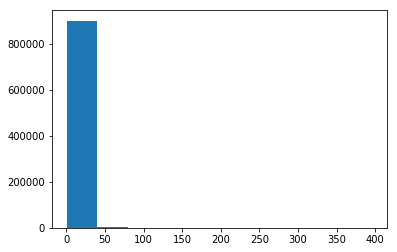

In [44]:
pylab.figure()
pylab.hist(mydata.visitNumber[~np.isnan(mydata.visitNumber)])
pylab.show()

let's select one user and check if visit number accumulated?
If we sum the max visitNumber for fullUserid, sum should be equal to vistis/ row number. 

- But the total max(visitNumber)/visits = 87.54%
- user id '824839726118485274'('0824839726118485274'): visit doesn't start from 1

In [81]:
mydata[['fullVisitorId', 'visitStartTime','visitNumber','visits']].sort_values(by=['fullVisitorId', 'visitStartTime'])[0:10]
# df.sort_values(by=['col1', 'col2'])

,fullVisitorId,visitStartTime,visitNumber,visits
211023,5103959234087,1471817208,1,1.0
230774,10278554503158,1477029466,1,1.0
89784,20424342248747,1480578901,1,1.0
683463,27376579751715,1486866293,1,1.0
243539,33471059618621,1480289088,1,1.0
717939,35794135966385,1484916385,1,1.0
648840,39460501403861,1490629516,1,1.0
683201,40862739425590,1486836571,1,1.0
683316,40862739425590,1486838824,2,1.0
280624,45417921646651,1485556332,1,1.0


In [69]:
t_visits = mydata[['fullVisitorId', 'visitStartTime','visitNumber','visits']].sort_values(by=['fullVisitorId', 'visitStartTime'])

### Let's check the user with 395 visits

In [78]:
t_visits.loc[(t_visits['fullVisitorId']==824839726118485274) | (t_visits['fullVisitorId']== '0824839726118485274')].sort_values(by='visitNumber')

,fullVisitorId,visitStartTime,visitNumber,visits
538768,824839726118485274,1470072711,113,1.0
537872,824839726118485274,1470074867,114,1.0
537936,824839726118485274,1470081893,115,1.0
487109,0824839726118485274,1470160488,116,1.0
487074,0824839726118485274,1470167400,117,1.0
215431,824839726118485274,1470255768,118,1.0
213799,824839726118485274,1470259609,119,1.0
708748,824839726118485274,1470335160,120,1.0
708533,824839726118485274,1470339964,121,1.0
708265,824839726118485274,1470343382,122,1.0


### Another high visits user:

In [80]:
t_visits.loc[(t_visits['visitNumber']>1) & (t_visits['fullVisitorId']!=824839726118485274) & (t_visits['fullVisitorId']!='0824839726118485274')].sort_values(by='visitNumber',ascending=False)

,fullVisitorId,visitStartTime,visitNumber,visits
64847,1957458976293878100,1501613885,326,1.0
64846,1957458976293878100,1501599019,325,1.0
712461,1957458976293878100,1501526649,324,1.0
340646,1957458976293878100,1500664755,323,1.0
340533,1957458976293878100,1500657362,322,1.0
722472,1957458976293878100,1499866736,321,1.0
466127,1957458976293878100,1499803210,320,1.0
771530,1957458976293878100,1499710838,319,1.0
625861,1957458976293878100,1499430065,318,1.0
338146,1957458976293878100,1499352960,317,1.0


In [65]:
sum( mydata.groupby(['fullVisitorId'])['visitNumber'].max())

1032293

In [68]:
903653/1032293

0.8753842174653902

In [54]:
# ['fullVisitorId', 'visitStartTime','visitNumber','visits']
# mydata.groupby(['fullVisitorId'])['visitNumber'].max()
mydata.loc[mydata.groupby(['fullVisitorId'])['visitNumber'].max() > 1]
# df.loc[df['column_name'].isin(some_values)]

IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match

In [56]:
mydata['fullVisitorId'][mydata['fullVisitorId']== mydata.groupby(['fullVisitorId'])['visitNumber'].max() > 1]

ValueError: Can only compare identically-labeled Series objects

In [ ]:
groups = mydata.groupby(by=['fullVisitorId'])
groups.apply(lambda g: g[g['visitNumber'] == g['visitNumber'].max()])

In [58]:
len(idlist)

742735

In [61]:
type(idlist)

pandas.core.series.Series

In [33]:
mydata[['visits','bounces','hits','newVisits','pageviews','transactionRevenue']].sum(skipna=True)

visits                9.036530e+05
bounces               4.506300e+05
hits                  4.153675e+06
newVisits             7.030600e+05
pageviews             3.478466e+06
transactionRevenue    1.540071e+12
dtype: float64

Exploring the outcome variable transactionRevenue:  
- transaction rate: 1.27% (0.0127427231470487 )
- distribution of revenue: very concentrated

In [30]:
mydata['transactionRevenue'].max(skipna=True)

23129500000.0

In [37]:
mydata['transactionRevenue'].describe()

count    1.151500e+04
mean     1.337448e+08
std      4.482852e+08
min      1.000000e+04
25%      2.493000e+07
50%      4.945000e+07
75%      1.076550e+08
max      2.312950e+10
Name: transactionRevenue, dtype: float64

In [34]:
1.151500e+04/len(raw)

0.0127427231470487

In [35]:
1.000000e+04

10000.0

In [38]:
2.312950e+10

23129500000.0

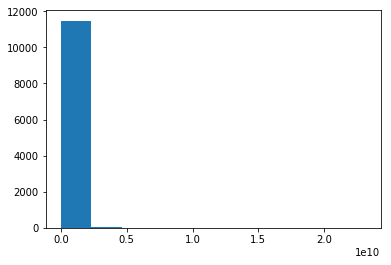

In [41]:
pylab.figure()
pylab.hist(mydata.transactionRevenue[~np.isnan(mydata.transactionRevenue)])
pylab.show()